# Dataset IRIS

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

Kode diatas akan mengimpor library yang dibutuhkan, untuk membuat principal component analysis untuk dataset.
* url berfungsi untuk mengisi link ke dataset Iris yang ada di repositori UCI.
* pd.read_csv: Fungsi dari pandas untuk membaca file CSV dari URL dan memuatnya ke dalam DataFrame. Dataset ini berisi data sepal (kelopak bunga) dan petal (mahkota bunga) dari tanaman Iris beserta kelasnya (target).
* names: Menentukan nama kolom untuk DataFrame

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df.loc[:, features].values

y = df.loc[:, ['target']].values

X = StandardScaler().fit_transform(X)

1. Pemisahan Fitur dan Target:

* Fitur input yang digunakan untuk analisis atau model adalah sepal length, sepal width, petal length, dan petal width, yang disimpan dalam variabel X.
* Target atau label untuk data adalah target, yang disimpan dalam variabel y.

2. Standarisasi Data:

* Data fitur (X) distandarisasi menggunakan StandardScaler sehingga setiap fitur memiliki rata-rata 0 dan standar deviasi 1. Ini memastikan bahwa fitur-fitur berada dalam skala yang sama, yang sangat penting saat menggunakan algoritma seperti PCA, yang sensitif terhadap perbedaan skala antar fitur.

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

1. Penerapan PCA: PCA diterapkan untuk mengurangi dimensi data dari 4 fitur menjadi 2 komponen utama. Proses ini membantu untuk memahami bagaimana variansi dalam data dapat dijelaskan dengan dua dimensi, yang lebih mudah untuk dianalisis atau divisualisasikan.

2. Transformasi Data: Data yang telah distandarisasi (X) ditransformasikan ke dalam ruang komponen utama, menghasilkan dua komponen utama yang masing-masing menjelaskan sebagian besar variansi data.

3. Pembuatan DataFrame: Data hasil transformasi ini (komponen utama) disusun dalam DataFrame yang lebih mudah dibaca dan digunakan untuk analisis lebih lanjut atau visualisasi.

In [ ]:
finalDF = pd.concat([principalDF, df[['target']]], axis=1)

Kode ini akan menggabungkan komponen utama hasil PCA dengan kolom target sehingga data yang sudah direduksi dimensinya tetap menyertakan label kelas yang asli.

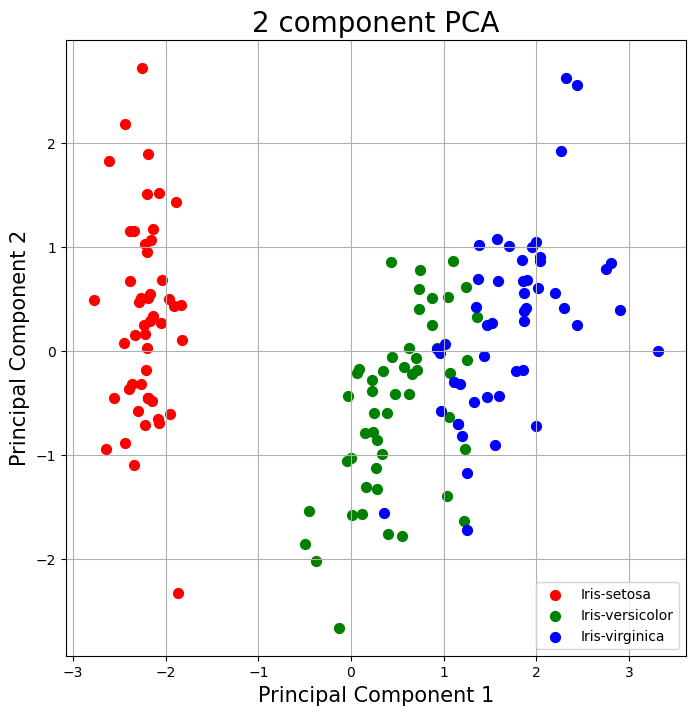

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
  indicesToKeep = finalDF['target'] == target
  ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'],
      finalDF.loc[indicesToKeep, 'principal component 2'],
      c=color, s=50)
ax.legend(targets)
ax.grid()

Hasil dari kode ini adalah scatter plot yang menunjukkan dua komponen utama dari PCA:

* Sumbu X mewakili Principal Component 1.
* Sumbu Y mewakili Principal Component 2.

Titik-titik pada plot diberi warna berdasarkan spesies bunga Iris yang sesuai:
* Merah (r) untuk Iris-setosa
* Hijau (g) untuk Iris-versicolor
* Biru (b) untuk Iris-virginica

Dengan visualisasi ini, dapat dengan mudah melihat pemisahan antar spesies berdasarkan dua komponen utama yang diperoleh dari PCA.

Analisis Hasil
* Iris-setosa (Merah) cenderung terpisah dengan jelas dari dua spesies lainnya. Titik-titik merah terlihat lebih terkelompok pada satu area di bagian kiri atas plot.
* Iris-versicolor (Hijau) dan Iris-virginica (Biru) lebih tersebar di sepanjang sumbu X dan Y, tetapi kedua kelompok ini juga terpisah satu sama lain, meskipun lebih saling tumpang tindih dibandingkan dengan Iris-setosa.
* Visualisasi ini menunjukkan bahwa Iris-setosa sangat mudah dipisahkan dari dua spesies lainnya berdasarkan dua komponen utama pertama. Namun, Iris-versicolor dan Iris-virginica sedikit lebih sulit dibedakan hanya berdasarkan dua komponen utama ini, meskipun ada pemisahan yang jelas.

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

Kode diatas menghasilkan output yang menunjukkan rasio varians yang dijelaskan untuk komponen utama dari Analisis Komponen Utama (PCA) yang dilakukan pada suatu kumpulan data.

Rasio varians yang dijelaskan adalah ukuran yang menunjukkan berapa banyak total varians dalam data yang dijelaskan oleh setiap komponen utama. Hal ini dihitung dengan membagi varians yang dijelaskan oleh masing-masing komponen utama dengan total varians dalam data.
Dalam kasus ini, keluarannya menunjukkan rasio varians yang dijelaskan untuk dua komponen utama pertama:

* Komponen utama pertama menjelaskan 72,27% dari total varians.
* Komponen utama kedua menjelaskan 23,03% dari total varians.

# Dataset Cars Clus

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
filename = 'cars_clus.csv'

pdf = pd.read_csv(filename, names=['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
                                   'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg'])

In [4]:
features = ['sales', 'resale', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap']
x = pdf.loc[:, features].values
x = pd.DataFrame(x, columns=features).apply(pd.to_numeric, errors='coerce').dropna().values
x = StandardScaler().fit_transform(x)

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principalDf)
principalDf['Cluster'] = kmeans.labels_

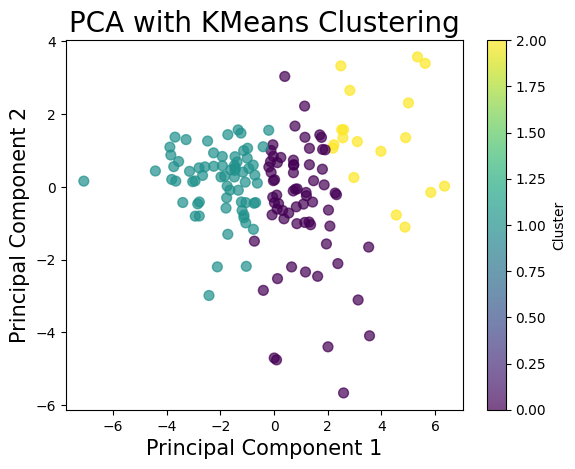

In [7]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
            c=principalDf['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('PCA with KMeans Clustering', fontsize=20)
plt.colorbar(label='Cluster')
plt.show()

Gambar diatas menunjukkan hasil analisis PCA untuk mereduksi dimensi data menjadi dua komponen utama (PC1 dan PC2) yang divisualisasikan dalam plot dua dimensi. Data kemudian dikelompokkan menggunakan algoritma KMeans menjadi tiga kluster, yang ditandai dengan warna berbeda (ungu, biru kehijauan, dan kuning). Visualisasi ini membantu memahami pola kluster dalam data setelah pengelompokan dan reduksi dimensi, serta melihat hubungan atau pemisahan antar kelompok.








In [8]:
print(pca.explained_variance_ratio_)

[0.52758327 0.21452615]


Nilai [0.52758327, 0.21452615] menunjukkan bahwa komponen utama pertama  menjelaskan sekitar 52.76% dari variansi total data, sementara komponen utama kedua menjelaskan 21.45%. Jadi, dua komponen ini bersama-sama menjelaskan sekitar 74.21% dari total variansi data.

In [9]:
components = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
print(components)

        sales    resale     price  engine_s  horsepow  wheelbas     width  \
PC1  0.217396  0.240168  0.304119  0.331088  0.357974  0.318855  0.409326   
PC2  0.299342 -0.513875 -0.400933  0.304517  0.064908  0.212079 -0.001722   

       length  curb_wgt  fuel_cap  
PC1  0.392513 -0.375716 -0.018957  
PC2  0.057043  0.058793  0.580470  


Tabel components menunjukkan kontribusi setiap fitur asli terhadap PC1 dan PC2. Nilai dalam tabel menunjukkan bobot atau koefisien fitur dalam membentuk masing-masing komponen utama.

Misalnya:

Untuk PC1, fitur horsepow memiliki kontribusi terbesar (0.357974), diikuti oleh width (0.409326) dan curb_wgt (0.392513).

Untuk PC2, fitur fuel_cap memiliki kontribusi dominan (0.580470), diikuti oleh price (-0.400933) dan resale (-0.513875).